In [68]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns

%matplotlib inline

# Reading whale returns

# Read in the whale_returns CSV as a DataFrame
whale_csv = pd.read_csv("whale_returns.csv")


# set date as index
whale_csv.set_index(pd.to_datetime(whale_csv['Date'], infer_datetime_format=True), inplace=True)
whale_csv.head()

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,,
2015-03-02,2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [58]:
# Count nulls
whale_csv.isnull()

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,,
2015-03-02,False,True,True,True,True
2015-03-03,False,False,False,False,False
2015-03-04,False,False,False,False,False
2015-03-05,False,False,False,False,False
2015-03-06,False,False,False,False,False
...,...,...,...,...,...
2019-04-25,False,False,False,False,False
2019-04-26,False,False,False,False,False
2019-04-29,False,False,False,False,False


In [26]:
# Drop nulls
whale_csv = whale_csv.dropna()
# Drop extraneous columns
whale_csv = whale_csv.drop("Date", axis=1)
##whale_csv = whale_csv.dropna()

whale_csv

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


In [27]:
# Reading algorithmic returns
algo_csv = pd.read_csv("algo_returns.csv")

# set date as index
algo_csv.set_index(pd.to_datetime(algo_csv['Date'], infer_datetime_format=True), inplace=True)
algo_csv = algo_csv.drop("Date", axis=1)
algo_csv.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [28]:
# Count nulls
algo_csv.isnull()

,Algo 1,Algo 2
Date,,
2014-05-28,False,True
2014-05-29,False,True
2014-05-30,False,True
2014-06-02,False,True
2014-06-03,False,True
...,...,...
2019-04-25,False,False
2019-04-26,False,False
2019-04-29,False,False


In [29]:
# Drop nulls
algo_csv = algo_csv.dropna()
algo_csv.isnull()


,Algo 1,Algo 2
Date,,
2014-06-05,False,False
2014-06-06,False,False
2014-06-09,False,False
2014-06-10,False,False
2014-06-11,False,False
...,...,...
2019-04-25,False,False
2019-04-26,False,False
2019-04-29,False,False


In [30]:
# Reading S&P 500 Closing Prices

sp500_csv = pd.read_csv("sp500_history.csv")
# set date as index
sp500_csv.set_index(pd.to_datetime(sp500_csv['Date'], infer_datetime_format=True), inplace=True)
sp500_csv.head()

,Date,Close
Date,,
2019-04-23,23-Apr-19,$2933.68
2019-04-22,22-Apr-19,$2907.97
2019-04-18,18-Apr-19,$2905.03
2019-04-17,17-Apr-19,$2900.45
2019-04-16,16-Apr-19,$2907.06


In [31]:
# Check Data Types
sp500_csv['Close'].dtype

dtype('O')

In [91]:
# Fix Data Types

sp500_csv["Close"] = sp500_csv["Close"].replace("$", "")
sp500_csv["Close"] = sp500_csv["Close"].replace(",", "")

sp500_csv.head()

,Date,Close
Date,,
2019-04-23,23-Apr-19,2933.68
2019-04-22,22-Apr-19,2907.97
2019-04-18,18-Apr-19,2905.03
2019-04-17,17-Apr-19,2900.45
2019-04-16,16-Apr-19,2907.06


In [89]:
sp500_csv['Close'] = sp500_csv['Close'].astype('float')
sp500_csv['Close'].dtype
sp500_csv.head()

,Date,Close
Date,,
2019-04-23,23-Apr-19,2933.68
2019-04-22,22-Apr-19,2907.97
2019-04-18,18-Apr-19,2905.03
2019-04-17,17-Apr-19,2900.45
2019-04-16,16-Apr-19,2907.06


In [34]:
# Calculate Daily Returns
sp500_return = sp500_csv[["Close"]].pct_change()
sp500_return.head()


,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


In [35]:
# Drop nulls
sp500_return = sp500_return.dropna()
sp500_return.head()


,Close
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


In [36]:
# Rename `Close` Column to be specific to this portfolio.
sp500_return = sp500_return.rename(columns={
    "Date": "Date",
    "Close": "S&P TSX"
})
sp500_return.head()



,S&P TSX
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


In [37]:
# Concat returns into one DataFrame
all_returns = pd.concat([whale_csv, algo_csv, sp500_return], axis='columns', join='inner')

all_returns = all_returns.dropna()
all_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254


In [38]:
# Perform Analysis

<AxesSubplot:xlabel='Date'>

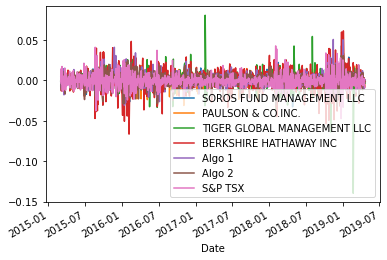

In [39]:
# Plot daily returns
all_returns.plot()

#### Plot cumulative return

<AxesSubplot:xlabel='Date'>

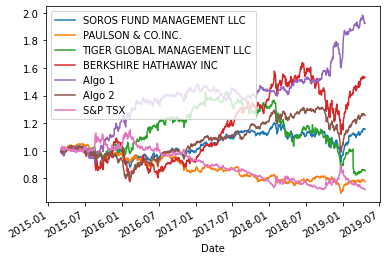

In [65]:
# Use the `cumprod` function to calculate cumulative returns
cumulative_returns = (1 + all_returns).cumprod()
#cumulative_returns#.tail()
cumulative_returns.plot()

In [ ]:

# assessment

# Assessment

### Both the Whale and Algorithic portfolios outperformed the S&P 500.

### Risk Analysis

<AxesSubplot:title={'center':'Portfolio Risk'}>

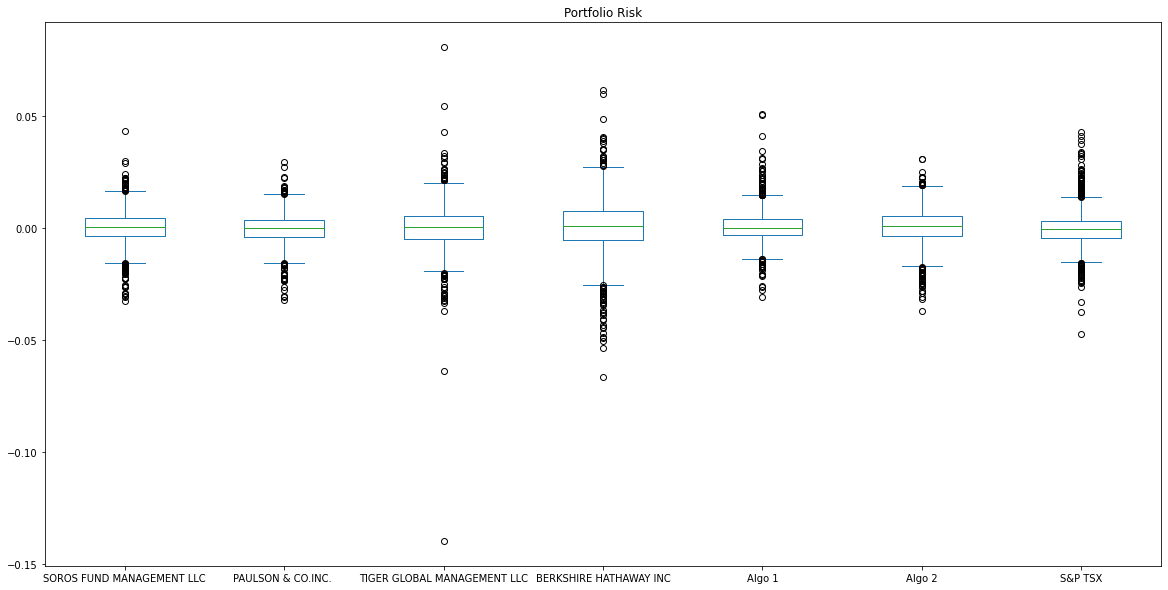

In [78]:
# Create a box plot for each of the returns.
all_returns.plot.box(figsize=(20, 10), title="Portfolio Risk")

In [52]:
# Calculate the standard deviation for each portfolio.
# Use the `std` function and multiply by the square root of the number of trading days in a year to get annualized volatility
volatility = all_returns.std() * np.sqrt(252)
volatility.sort_values(inplace=True)
volatility.tail()

SOROS FUND MANAGEMENT LLC      0.125348
Algo 2                         0.132413
S&P TSX                        0.136313
TIGER GLOBAL MANAGEMENT LLC    0.172989
BERKSHIRE HATHAWAY INC         0.205079
dtype: float64

# The following are riskier than the S&P 500.

### 1. Berkshire
### 2. Tiger Global

In [ ]:
# Calculate the annualized standard deviation.


## Rolling Statistics

In [56]:
#Calculate and plot the rolling standard deviation for all portfolios, using a 21-day window.

#### Calculate 21-day Simple Moving Average for the Whale data

<AxesSubplot:xlabel='Date'>

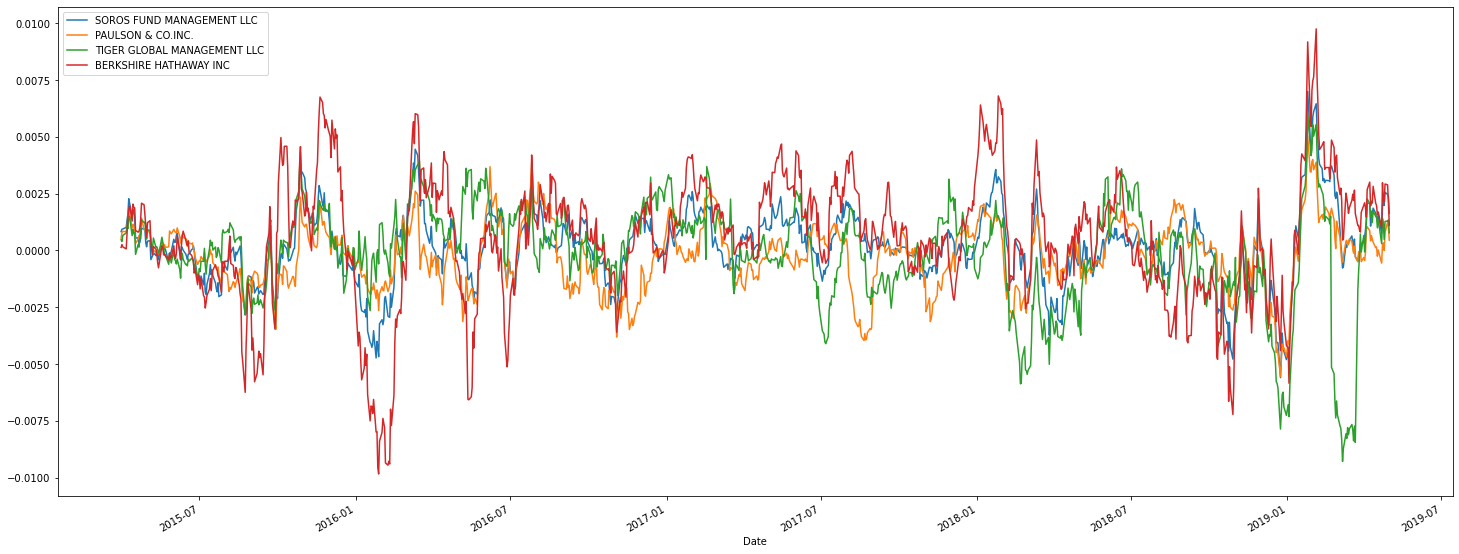

In [59]:
whale_sma_21 = whale_csv.rolling(window=21).mean()
#whale_sma_21
whale_sma_21.plot(figsize=(25,10))

#### Calculate 21-day Simple Moving Average for the Algo data

<AxesSubplot:xlabel='Date'>

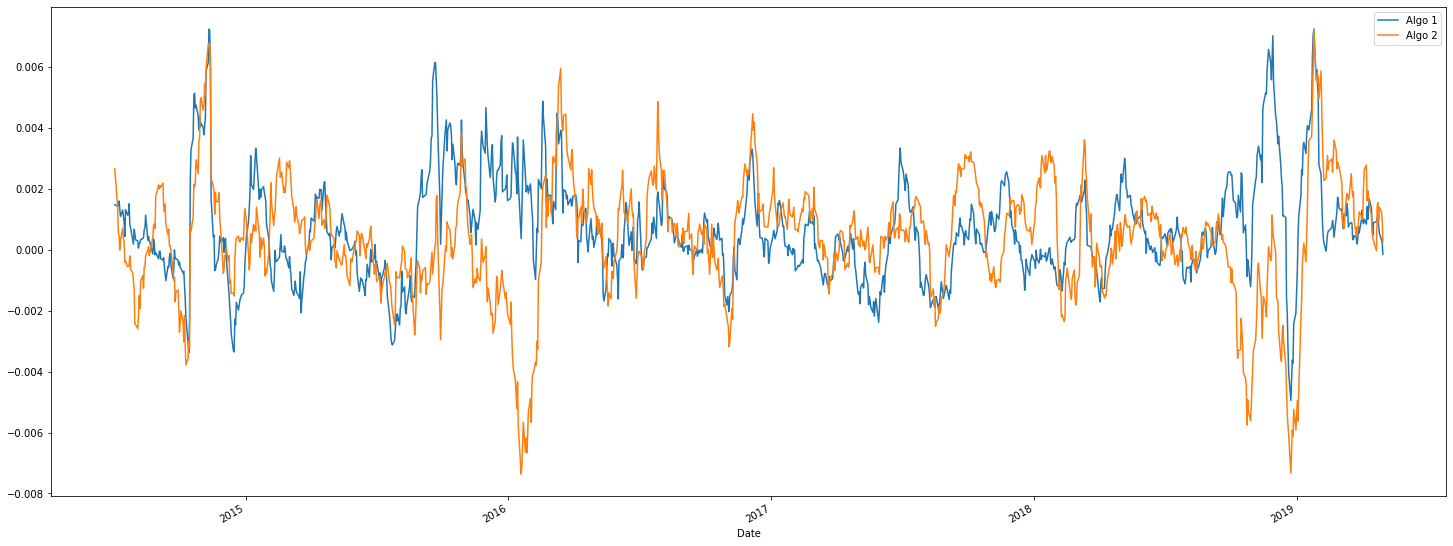

In [61]:
algo_sma_21 = algo_csv.rolling(window=21).mean()
algo_sma_21
algo_sma_21.plot(figsize=(25,10))

#### Calculate 21-day Simple Moving Average for the S&P 500

<AxesSubplot:xlabel='Date'>

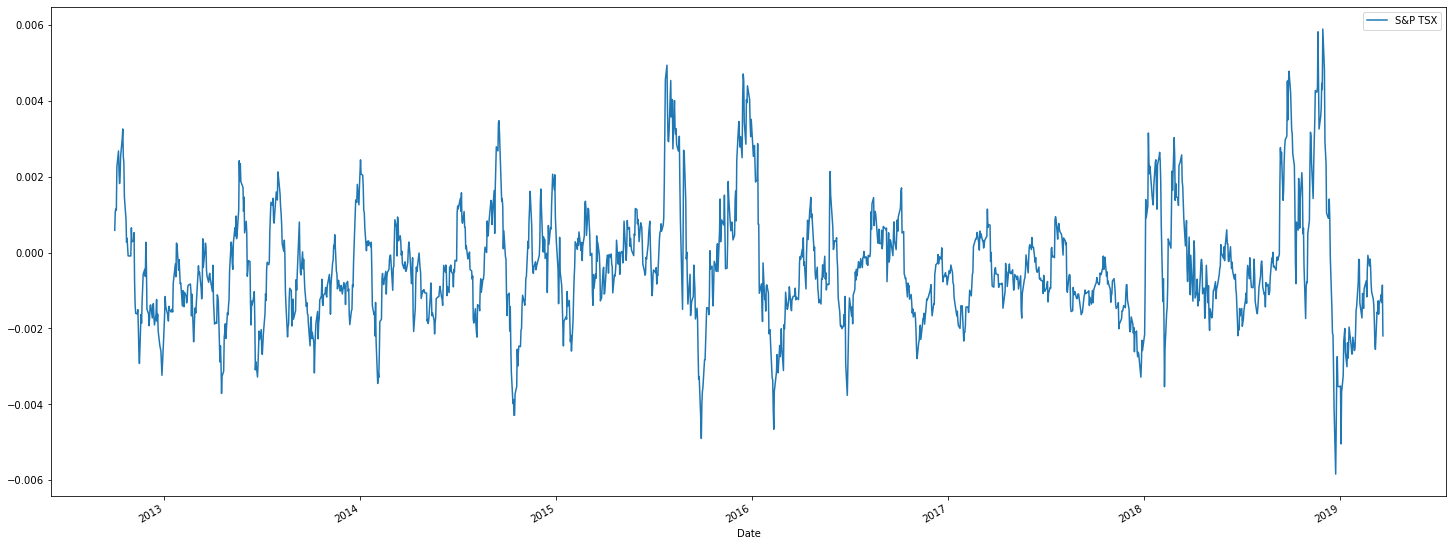

In [63]:
sp500_sma_21 = sp500_return.rolling(window=21).mean()
sp500_sma_21
sp500_sma_21.plot(figsize=(25,10))

#### Calculate and plot the correlation between each stock to determine which portfolios mimic the S&P 500.

In [66]:
# Use the `corr` function to calculate the correlation between stock returns
correlation = all_returns.corr()
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
SOROS FUND MANAGEMENT LLC,1.000000,0.699823,0.561040,0.754157,0.320901,0.826730,0.000574
PAULSON & CO.INC.,0.699823,1.000000,0.434308,0.545451,0.268631,0.678085,0.013549
TIGER GLOBAL MANAGEMENT LLC,0.561040,0.434308,1.000000,0.424125,0.164114,0.507160,-0.001505
BERKSHIRE HATHAWAY INC,0.754157,0.545451,0.424125,1.000000,0.291678,0.687756,-0.013856
Algo 1,0.320901,0.268631,0.164114,0.291678,1.000000,0.287852,-0.033963
Algo 2,0.826730,0.678085,0.507160,0.687756,0.287852,1.000000,-0.002192
S&P TSX,0.000574,0.013549,-0.001505,-0.013856,-0.033963,-0.002192,1.000000


<AxesSubplot:>

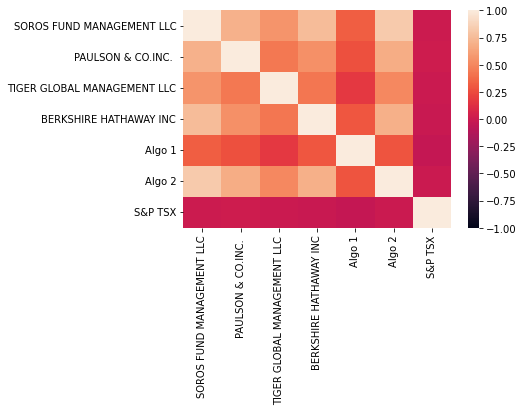

In [70]:
# Use the `heatmap` function from the Seaborn library to visualize the correlation table
sns.heatmap(correlation, vmin=-1, vmax=1)

#### Calculate and plot the 60-day rolling beta between Algo data and the S&P 500.

In [73]:
# Calculate covariance of all daily returns of Algo stocks vs. S&P 500
algo1_covariance = all_returns['Algo 1'].cov(all_returns['S&P TSX'])
algo2_covariance = all_returns['Algo 2'].cov(all_returns['S&P TSX'])

algo1_covariance

-2.2230425517155116e-06

##### Calculate Variance of S&P 500

In [75]:
# Calculate variance of all daily returns of stocks vs. S&P 500
variance = all_returns['S&P TSX'].var()
variance

7.373467552840441e-05

##### Calculate Variance of Algo 1 and ALgo 2

In [76]:
# Calculate beta of all daily returns of Also stocks
algo1_beta = algo1_covariance / variance
algo2_beta = algo2_covariance / variance

print(f"Algo 1: {algo1_beta} | Algo 2: {algo2_beta}")

Algo 1: -0.03014921454233756 | Algo 2: -0.002129237736587648


#### Calculate 60-Day Rolling Betas of Algo Stock Returns vs. S&P 500 Returns

In [77]:
# Calculate 60-day rolling covariance of Algo 1 vs. S&P 500 and plot the data
rolling_algo1_covariance = all_returns['Algo 1'].rolling(window=60).cov(all_returns['S&P TSX'])
rolling_algo2_covariance = all_returns['Algo 2'].rolling(window=60).cov(all_returns['S&P TSX'])

# Calculate 60-day rolling variance of S&P 500
rolling_variance = all_returns['S&P TSX'].rolling(window=60).var()

# Calculate 60-day rolling beta of Algo and plot the data
rolling_algo1_beta = rolling_algo1_covariance / rolling_variance
rolling_algo2_beta = rolling_algo2_covariance / rolling_variance
rolling_algo1_beta

Date
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
                ...   
2019-04-15   -0.116546
2019-04-16   -0.102774
2019-04-17   -0.101901
2019-04-18   -0.103039
2019-04-22   -0.113498
Length: 1042, dtype: float64

### Plot Rolling 30-Day Betas of Algo Stocks

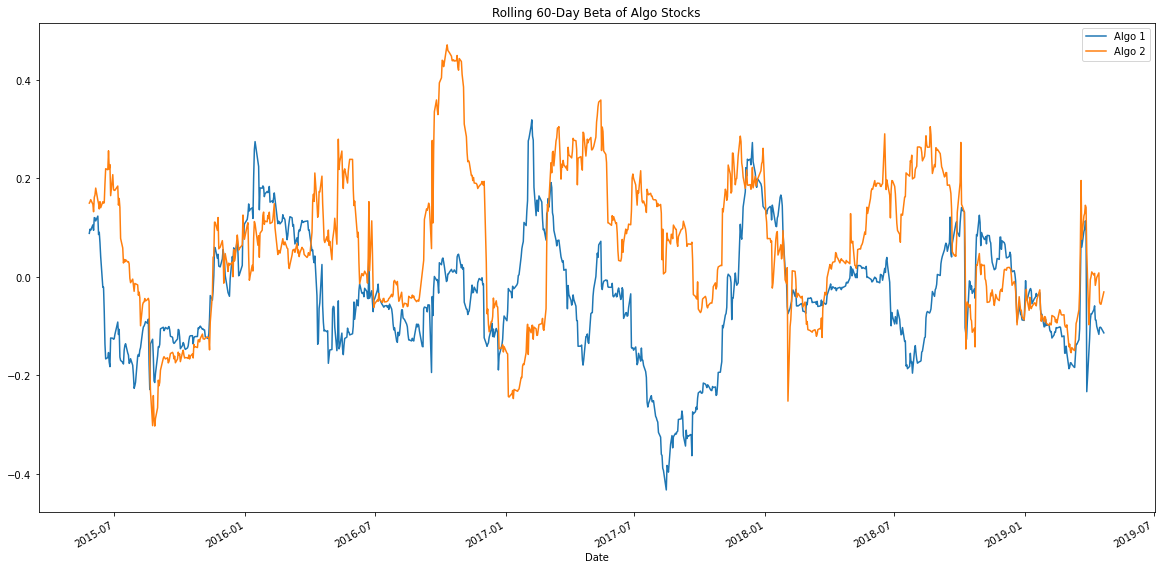

In [79]:
# Set the figure and plot the different datasets as multiple trends on the same figure
ax = rolling_algo1_beta.plot(figsize=(20, 10), title='Rolling 60-Day Beta of Algo Stocks')
rolling_algo2_beta.plot(ax=ax)

# Set the legend of the figure
ax.legend(["Algo 1", "Algo 2"])

#### Sharpe Ratios

In [ ]:
#Using the daily returns, calculate the Sharpe ratios and visualize them in a bar plot.
# Use the `mean` and `std` functions to calculate the annualized sharpe ratio
sharpe_ratios = (all_returns.mean() * 252) / (all_returns.std() * np.sqrt(252))
sharpe_ratios


SOROS FUND MANAGEMENT LLC      0.342894
PAULSON & CO.INC.             -0.491422
TIGER GLOBAL MANAGEMENT LLC   -0.130186
BERKSHIRE HATHAWAY INC         0.606743
Algo 1                         1.369589
Algo 2                         0.484334
S&P TSX                       -0.518582
dtype: float64

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

##### Based onthe Sharp Ration of Algo 1 being the closest to 1.  
##### Algo 1 ourperformed The whale stocks and the S&P TSX

## Create a Custom Portfolio

In [104]:
# Download the data as CSV files and calculate the portfolio returns.
# Reading apple returns

# Read in the apple_returns CSV as a DataFrame
apple_csv = pd.read_csv("aapl_historical.csv")

# set date as index
apple_csv.set_index(pd.to_datetime(apple_csv['Trade DATE'], infer_datetime_format=True), inplace=True)

# Drop nulls
apple_csv = apple_csv.dropna()

# Drop extraneous columns
apple_csv = apple_csv.drop("Trade DATE", axis=1)

apple_csv.head()


,Symbol,NOCP
Trade DATE,,
2019-05-09,AAPL,200.72
2019-05-08,AAPL,202.90
2019-05-07,AAPL,202.86
2019-05-06,AAPL,208.48
2019-05-03,AAPL,211.75


In [105]:
# Read in the cost_returns CSV as a DataFrame
cost_csv = pd.read_csv("cost_historical.csv")

# set date as index
cost_csv.set_index(pd.to_datetime(cost_csv['Trade DATE'], infer_datetime_format=True), inplace=True)

# Drop nulls
cost_csv = cost_csv.dropna()

# Drop extraneous columns
cost_csv = cost_csv.drop("Trade DATE", axis=1)

cost_csv.head()


,Symbol,NOCP
Trade DATE,,
2019-05-09,COST,243.47
2019-05-08,COST,241.34
2019-05-07,COST,240.18
2019-05-06,COST,244.23
2019-05-03,COST,244.62


In [106]:
# Read in the goog_returns CSV as a DataFrame
goog_csv = pd.read_csv("goog_historical.csv")

# set date as index
goog_csv.set_index(pd.to_datetime(goog_csv['Trade DATE'], infer_datetime_format=True), inplace=True)

# Drop nulls
goog_csv = goog_csv.dropna()

# Drop extraneous columns
goog_csv = goog_csv.drop("Trade DATE", axis=1)

goog_csv.head()


,Symbol,NOCP
Trade DATE,,
2019-05-09,GOOG,1162.38
2019-05-08,GOOG,1166.27
2019-05-07,GOOG,1174.10
2019-05-06,GOOG,1189.39
2019-05-03,GOOG,1185.40


In [107]:
# Concat returns into one DataFrame
my_returns = pd.concat([apple_csv, cost_csv, goog_csv], axis='columns', join='inner')

my_returns = my_returns.dropna()
my_returns.head()



,Symbol,NOCP,Symbol,NOCP,Symbol,NOCP
Trade DATE,,,,,,
2019-05-09,AAPL,200.72,COST,243.47,GOOG,1162.38
2019-05-08,AAPL,202.90,COST,241.34,GOOG,1166.27
2019-05-07,AAPL,202.86,COST,240.18,GOOG,1174.10
2019-05-06,AAPL,208.48,COST,244.23,GOOG,1189.39
2019-05-03,AAPL,211.75,COST,244.62,GOOG,1185.40


In [111]:
# Calculate Daily Returns
#my_daily_returns = my_returns[["Trade DATE"]].pct_change()
#my_daily_returns.head()


In [ ]:
#Calculate the weighted returns for your portfolio, assuming equal number of shares per stock.

In [ ]:
# Add your portfolio returns to the DataFrame with the other portfolios.

In [ ]:
# Run the following analyses:

# Calculate the annualized standard deviation.
# Calculate and plot the rolling standard deviation with a 21-day window.
# Calculate and plot the correlation.
# Calculate and plot beta for your portfolio compared to the S&P 60 TSX.
# Calculate the Sharpe ratios and generate a bar plot.
# How does your portfolio perform?